The aim of this notebook is to perform simple web scraping on dynamic web using Selenium and BeautifulSoup packages. We will try to gather data about SSD product on Shopee website. The collected data will be stored in Pandas DataFrame and further analysis can be conducted.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup as soup
from selenium import webdriver
import re
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Let's use Chrome browser and its webdriver (download first here https://chromedriver.chromium.org/downloads). Open the URL using webdriver from Selenium.

note: the webage must be loaded completely in order to proceed to the next step

In [2]:
path = r'C:\Users\ASUS\Downloads\Programs\chromedriver.exe'  #place your chromedriver.exe filepath
url = 'https://shopee.co.id/search?category=134&keyword=ssd&subcategory=1341'
driver = webdriver.Chrome(path)
driver.get(url)

Get the page source of the webpage and parse it into HTML text. 

In [3]:
html = driver.page_source
page = soup(html,'html.parser')

Using 'Inspect' on the webpage and diving the HTML script, we can see that each SSD product info are contained within div tag with class attribute 'col-xs-2-4 shopee-search-item-result__item'. 

In [4]:
containers = page.findAll('div',{'class' : 'col-xs-2-4 shopee-search-item-result__item'})
print(len(containers))
item = containers[0]

47


There are total 47 items (could changed whenever we reload the page) showed in the webpage (only in page one). Let's get the first item to see how to obtain the information we needed. Firstly, we want to extract the product name, price, and shop location. All of these information are contained in:
- title/name &#8594; class  '\_1NoI8\_ _16BAGk' 
- price &#8594; class  '_1w9jLI _37ge-4 _2ZYSiu'
- shop location &#8594; class  '_3amru2'

In [5]:
item_title = item.findAll('div',{'class' : '_1NoI8_ _16BAGk'})
item_title[0].text

'SSD KINGSTON V400 120GB SATA3 SOLID STATE DISK ORIGINAL BARU SSD 2.5"'

In [6]:
item_price = item.findAll('div',{'class' : '_1w9jLI _37ge-4 _2ZYSiu'})
item_price[0].text

'Rp247.000'

In [7]:
item_location = item.findAll('div',{'class' : '_3amru2'})
item_location[0].text

'KOTA JAKARTA UTARA'

Next, we will iterate over all of the items to obtain each information needed in a list.

In [8]:
name, price, location = list(), list(), list()

for i in containers:   
    try:
        item_title = i.findAll('div',{'class' : '_1NoI8_ _16BAGk'})
        name.append(item_title[0].text)
        
        item_price = i.findAll('div',{'class' : '_1w9jLI _37ge-4 _2ZYSiu'})
        price.append(item_price[0].text)
        
        item_location = i.findAll('div',{'class' : '_3amru2'})
        location.append(item_location[0].text)
    except IndexError:
        pass

If checked thoroughly, it turns out that some items have their product names contained in class  '\_1NoI8\_ \_1JBBaM'. Hence, we have to do iteration again using this class specification.

In [9]:
for i in containers:   
    try:
        item_title = i.findAll('div',{'class' : '_1NoI8_ _1JBBaM'})
        name.append(item_title[0].text)
        
        item_price = i.findAll('div',{'class' : '_1w9jLI _37ge-4 _2ZYSiu'})
        price.append(item_price[0].text)
        
        item_location = i.findAll('div',{'class' : '_3amru2'})
        location.append(item_location[0].text)
    except IndexError:
        pass

Next, combine all of the list to form a single DataFrame.

In [11]:
df = pd.DataFrame(list(zip(name, price, location)), 
               columns =['Product Name', 'Price', 'Shop Location']) 
df 

,Product Name,Price,Shop Location
0,SSD KINGSTON V400 120GB SATA3 SOLID STATE DISK...,Rp247.000,KOTA JAKARTA UTARA
1,Seagate Ultra Touch SSD Eksternal 500GB USB3.0,Rp1.450.000,KOTA JAKARTA PUSAT
2,ADATA SSD SU650 120GB - SATA III,Rp245.000,KOTA JAKARTA PUSAT
3,SSD Kingmax 120GB SATA III 2.5,Rp229.000,KOTA JAKARTA BARAT
4,"SSD Adata SU650 120GB - SSD Internal 2.5"" SATA...",Rp245.000,KOTA JAKARTA BARAT
5,SSD V-Gen 128GB - Sata 3 VGen 128 GB,Rp262.000,KOTA JAKARTA PUSAT
6,SSD 128GB 256GB 512GB 1TB V-GeN 120GB 240GB 48...,Rp268.000 - Rp1.363.000,KAB. TANGERANG
7,Adata SSD SU650 Ultimate 240GB Sata 3 - SU650 ...,Rp416.000,KOTA JAKARTA PUSAT
8,WD Blue SSD 3D Nand 500GB Sata 3 - WDC Blue 3D...,Rp1.040.000,KOTA JAKARTA PUSAT
9,Kingmax SSD SMV32 120GB Sata 3,Rp229.000,KOTA JAKARTA PUSAT


As we can see, several products have price in range form (typically bundle items). Let's just focus on items with single price.

In [12]:
df = df[df['Price'].str.len()<15]
df

,Product Name,Price,Shop Location
0,SSD KINGSTON V400 120GB SATA3 SOLID STATE DISK...,Rp247.000,KOTA JAKARTA UTARA
1,Seagate Ultra Touch SSD Eksternal 500GB USB3.0,Rp1.450.000,KOTA JAKARTA PUSAT
2,ADATA SSD SU650 120GB - SATA III,Rp245.000,KOTA JAKARTA PUSAT
3,SSD Kingmax 120GB SATA III 2.5,Rp229.000,KOTA JAKARTA BARAT
4,"SSD Adata SU650 120GB - SSD Internal 2.5"" SATA...",Rp245.000,KOTA JAKARTA BARAT
5,SSD V-Gen 128GB - Sata 3 VGen 128 GB,Rp262.000,KOTA JAKARTA PUSAT
7,Adata SSD SU650 Ultimate 240GB Sata 3 - SU650 ...,Rp416.000,KOTA JAKARTA PUSAT
8,WD Blue SSD 3D Nand 500GB Sata 3 - WDC Blue 3D...,Rp1.040.000,KOTA JAKARTA PUSAT
9,Kingmax SSD SMV32 120GB Sata 3,Rp229.000,KOTA JAKARTA PUSAT
10,Solid State Drive V-GeN 256GB M.2 NVMe PCIe Ge...,Rp598.000,KOTA JAKARTA PUSAT


The prices showed on the DataFrame are in string data type. We can split the Rupiah currency, ignore the dots, and convert it to numeric data for further data processing.

In [13]:
df['Price'] = pd.to_numeric(df['Price'].apply(lambda x: re.sub("R|p|\.", "", x)))
df

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Product Name,Price,Shop Location
0,SSD KINGSTON V400 120GB SATA3 SOLID STATE DISK...,247000,KOTA JAKARTA UTARA
1,Seagate Ultra Touch SSD Eksternal 500GB USB3.0,1450000,KOTA JAKARTA PUSAT
2,ADATA SSD SU650 120GB - SATA III,245000,KOTA JAKARTA PUSAT
3,SSD Kingmax 120GB SATA III 2.5,229000,KOTA JAKARTA BARAT
4,"SSD Adata SU650 120GB - SSD Internal 2.5"" SATA...",245000,KOTA JAKARTA BARAT
5,SSD V-Gen 128GB - Sata 3 VGen 128 GB,262000,KOTA JAKARTA PUSAT
7,Adata SSD SU650 Ultimate 240GB Sata 3 - SU650 ...,416000,KOTA JAKARTA PUSAT
8,WD Blue SSD 3D Nand 500GB Sata 3 - WDC Blue 3D...,1040000,KOTA JAKARTA PUSAT
9,Kingmax SSD SMV32 120GB Sata 3,229000,KOTA JAKARTA PUSAT
10,Solid State Drive V-GeN 256GB M.2 NVMe PCIe Ge...,598000,KOTA JAKARTA PUSAT


Still need more information of the products? Let's extract the SSD size in GB(GigaBytes) from the product name. We can see that most items name have xxxGB pattern on it with xxx refers to the GB size of the product. To extract this elements, we need string processing using regular expression.

In [14]:
def to_GB(x):
    if not x:
        x = 'None'
    else:
        x = x.group(1)
    return(x)

df['Size (GB)'] = df['Product Name'].apply(lambda x: re.search(' (.{3})GB', x, re.IGNORECASE)).apply(to_GB)
df

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Product Name,Price,Shop Location,Size (GB)
0,SSD KINGSTON V400 120GB SATA3 SOLID STATE DISK...,247000,KOTA JAKARTA UTARA,120
1,Seagate Ultra Touch SSD Eksternal 500GB USB3.0,1450000,KOTA JAKARTA PUSAT,500
2,ADATA SSD SU650 120GB - SATA III,245000,KOTA JAKARTA PUSAT,120
3,SSD Kingmax 120GB SATA III 2.5,229000,KOTA JAKARTA BARAT,120
4,"SSD Adata SU650 120GB - SSD Internal 2.5"" SATA...",245000,KOTA JAKARTA BARAT,120
5,SSD V-Gen 128GB - Sata 3 VGen 128 GB,262000,KOTA JAKARTA PUSAT,128
7,Adata SSD SU650 Ultimate 240GB Sata 3 - SU650 ...,416000,KOTA JAKARTA PUSAT,240
8,WD Blue SSD 3D Nand 500GB Sata 3 - WDC Blue 3D...,1040000,KOTA JAKARTA PUSAT,500
9,Kingmax SSD SMV32 120GB Sata 3,229000,KOTA JAKARTA PUSAT,120
10,Solid State Drive V-GeN 256GB M.2 NVMe PCIe Ge...,598000,KOTA JAKARTA PUSAT,256


Allright, we got the GB size! Some of the products do not have the aforementioned string pattern (either the products literally don't have the GB information or the sizes are written in TB) so the GB size can't be extracted and this leads to 'None' result.

SSD data with desired format are in our hands. The next step is performing data visualization for further analysis.

Text(0.5, 1.0, 'Shop location distribution')

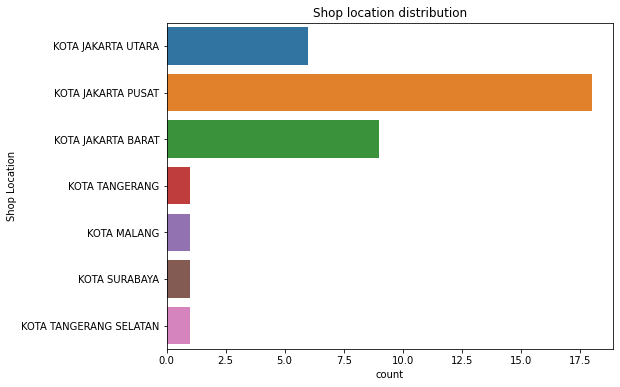

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['Shop Location'])
plt.title('Shop location distribution')

Text(0.5, 1.0, 'Item distribution based on GB size')

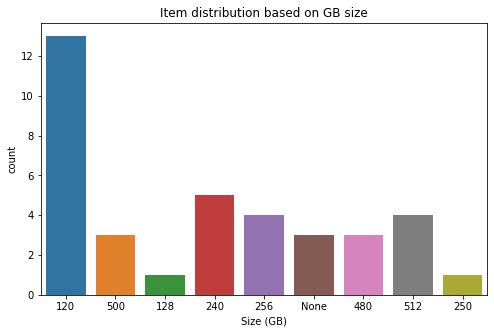

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Size (GB)'])
plt.title('Item distribution based on GB size')

Text(0.5, 1.0, 'Item price distribution based on GB size')

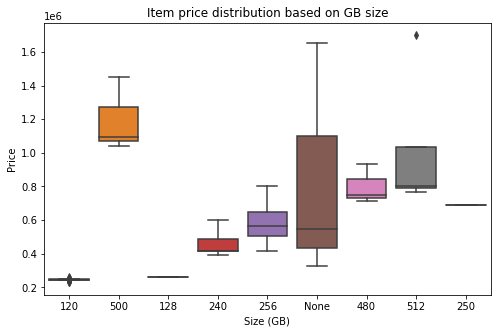

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Size (GB)', y='Price', data=df)
plt.title('Item price distribution based on GB size')